In [1]:
!pip install -e ..

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/jovyan/Documents/workspace/med_metrics
  Preparing metadata (setup.py) ... done
  Attempting uninstall: med-metrics
    Found existing installation: med-metrics 0.1
    Uninstalling med-metrics-0.1:
      Successfully uninstalled med-metrics-0.1
  Running setup.py develop for med-metrics


In [2]:
from med_metrics.bootstrap import bootstrap_evaluation, analyze_bootstrap_results, summarize_bootstrap_results, plot_bootstrap_curve
from med_metrics.metrics import average_NNTvsTreated, average_net_benefit
from med_metrics.curves import NNTvsTreated_curve, net_benefit_curve
from med_metrics.compatibility_metrics import backwards_trust_compatibility, backwards_error_compatibility, rank_based_compatibility

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve

# Generate Data

In [7]:
n = 1000
rng = np.random.default_rng(42)
p = rng.uniform(0,1,n)
q = np.random.uniform(0,1,n)
y_true = rng.binomial(1, p)

# Set up bootstrap parameters and perform bootstrapping

In [4]:
# Bootstrap parameters
# want model_0 to be worse than model_1
y_scores = {'model_0': p*q,
            'model_1': p}

metric_funcs = {'roc_auc_score': roc_auc_score, 
                'average_NNTvsTreated': average_NNTvsTreated}

metric_funcs_kwargs = {'average_NNTvsTreated': {'rho':0.4}}

curve_funcs = {'roc_curve': roc_curve, 
               'NNTvsT': NNTvsTreated_curve}

curve_funcs_kwargs = {'NNTvsT': {'rho':0.4}}


# Perform the bootstrap analysis
bootstrapped_results = bootstrap_evaluation(
    y_true=y_true,
    y_scores=y_scores,
    metric_funcs=metric_funcs,
    curve_funcs=curve_funcs,
    compatibility_metric_funcs=rank_based_compatibility,
    n_bootstraps=1000,
    random_state=42,
    metric_funcs_kwargs=metric_funcs_kwargs,
    curve_funcs_kwargs=curve_funcs_kwargs
)

# Summarize bootstrap results

In [5]:
mf_summary_results, _ = summarize_bootstrap_results(bootstrapped_results)
display(pd.DataFrame(mf_summary_results))

,roc_auc_score,average_NNTvsTreated
model_0,"0.703 (0.674, 0.734)","3.895 (3.665, 4.104)"
model_1,"0.818 (0.794, 0.844)","3.539 (3.366, 3.698)"


# Plot bootstrap results for NNT vs. Number Treated Curves

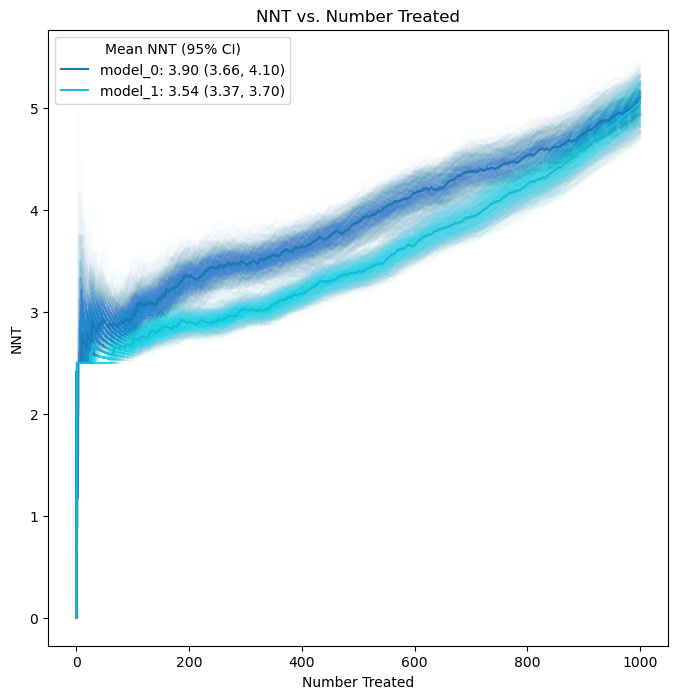

In [6]:
_ = plot_bootstrap_curve(bootstrapped_results, 'average_NNTvsTreated', 'NNTvsT',
                         xlabel='Number Treated', ylabel='NNT', 
                         title='NNT vs. Number Treated', legend_title='Mean NNT')